# CHECKPOINT 11: DETERMINING THE MOMENTUM RESOLUTION FOR MUON TRACKS AT LHCb WITH NN REGRESSION

In [1]:
# Standard import(s)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### EXERCISE 1: 
Open the CSV file, and feed the data into a pandas.core.frame.DataFrame object. Do a sanity check of the dataset: Is the definition for all variables clear? Do all variables have the same number of entries? Are there any null values that need to be discarded?
Reproduce the scatter plot of Fig. 1. Make sure to zoom in the plot in a way that allows you to see clearly the different momentum resolution bands.
Hint #1: you may want to review the material taught in last semester (on Data Science Tools) for dealing with questions on data handling and variable plotting.

In [2]:
# Load dataset
data_set = pd.read_csv('mc-chic1.csv')

In [3]:
data_set.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


In [4]:
data_set.describe()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
count,208984.000000,208984.000000,208984.000000,208984.000000,208984.000000,208984.000000,208984.000000,208984.000000,208984.000000,208984.000000,208984.000000
mean,104491.500000,0.004582,3.536235,38.009716,0.020532,-0.013015,2.057444,-0.057122,-0.000804,0.000338,-3.537095
std,60328.628666,0.001043,0.535136,46.989681,1.781738,0.999918,2.188101,60.438169,0.050532,0.058026,40.933908
min,0.000000,0.002469,1.817449,2.984704,-3.140953,-1.000000,0.182415,-1121.218000,-0.261077,-0.260077,-177.157300
25%,52245.750000,0.003846,3.153929,8.014261,-1.572803,-1.000000,0.466294,-18.415584,-0.032667,-0.038117,-30.886000
50%,104491.500000,0.004337,3.530497,18.407946,0.087080,-1.000000,1.100179,-0.000750,-0.000798,0.002586,-3.441400
75%,156737.250000,0.005027,3.922414,51.289614,1.601350,1.000000,3.103085,18.401911,0.031472,0.038615,23.986100
max,208983.000000,0.029343,5.096044,1121.218000,3.141593,1.000000,33.016370,846.472400,0.290477,0.258590,162.495500


All properties have the same number of entries.

In [5]:
data_set.isnull().values.any()

False

In [6]:
data_set.isnull().sum()

Unnamed: 0    0
ep            0
eta           0
p             0
phi           0
pol           0
pt            0
qp            0
tx            0
ty            0
zV            0
dtype: int64

Check to see if there are null values that need to be discarded. No null values found.

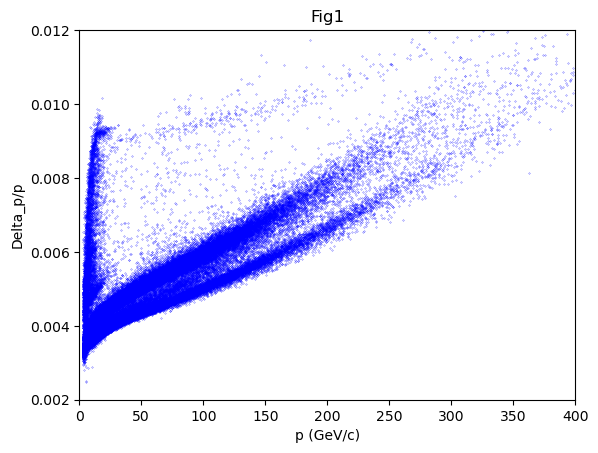

In [7]:
plt.plot(data_set["p"], data_set["ep"], "o", markersize = 0.2, color = "blue")
plt.ylim([0.002,0.012])
plt.xlim([0, 400])
plt.xlabel("p (GeV/c)")
plt.ylabel("Delta_p/p")
plt.title("Fig1")
plt.show();

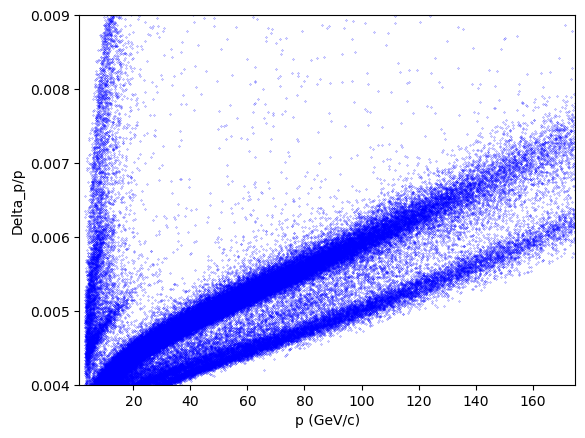

In [8]:
plt.plot(data_set["p"], data_set["ep"], "o", markersize = 0.2, color = "blue")
plt.ylim([0.004,0.009])
plt.xlim([1, 175])
plt.xlabel("p (GeV/c)")
plt.ylabel("Delta_p/p")
plt.show();

### EXERCISE 2:
Demonstrate that pT ≪ pz in two ways:
* Plot the 1D distributions for p and pT in log scale.
* Use the “data-appending” method (pandas.DataFrame.append) to add the vari- ables pz (i.e. pz ≡ sqrt(p^2 − pT^2) ) and epz (= ep * p/pz, i.e. effectively σpz /pz ) in the DataFrame object. Create the σpz /pz vs. pz scatter plot and demonstrate that it is qualitatively identical to Fig. 1.

Hint #2: It is good practice to make a copy of the DataFrame object before appending data (in case something goes wrong).
Hint #3: You may want to use method pandas.DataFrame.iterrows in your data- appending operation.

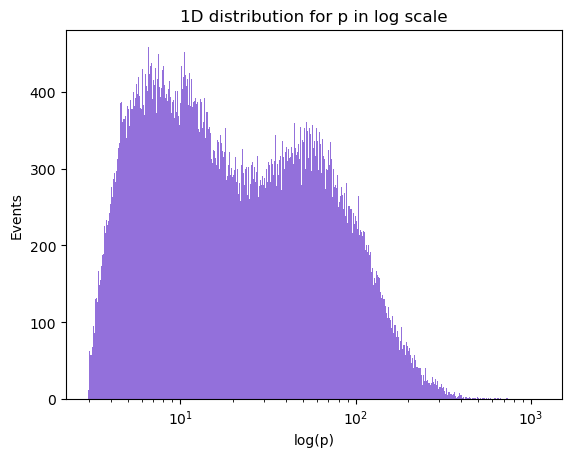

In [9]:
hist, bins = np.histogram(data_set["p"], bins=1000)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data_set["p"], bins=logbins, color = "mediumpurple")
plt.title("1D distribution for p in log scale")
plt.ylabel("Events")
plt.xlabel("log(p)")
plt.xscale('log')
plt.show();

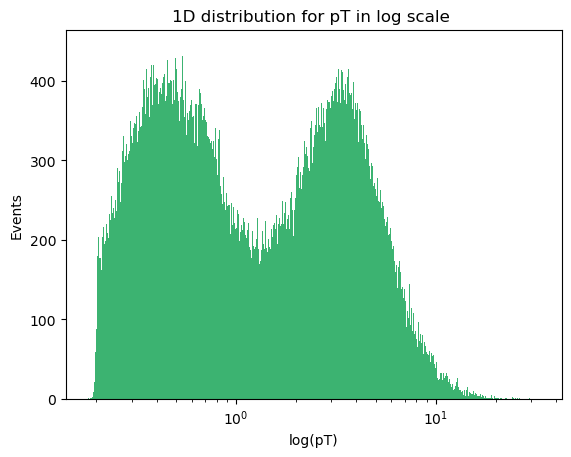

In [10]:
hist, bins = np.histogram(data_set["pt"], bins=1000)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(data_set["pt"], bins=logbins, color = "mediumseagreen")
plt.title("1D distribution for pT in log scale ")
plt.ylabel("Events")
plt.xlabel("log(pT)")
plt.xscale('log')
plt.show();

By looking at the plot we can see how p is much larger in the order of almost 2 order of magnitudes in log. (Kind of the same shape for both plots (with events)). Because p = sqrt(px^2 + py^2 + pz^2) and pT = sqrt(px^2 + py^2) tha fact that p is much larger than pT has to come from pz, and hence we can say that pz >> pT.

In [11]:
data_set2 = data_set

In [12]:
data_set2.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


In [13]:
data_set2["pz"] = np.sqrt(data_set2["p"] * data_set2["p"] - data_set2["pt"] * data_set2["pt"])

In [14]:
data_set2.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050


In [15]:
data_set2["epz"] = data_set2["ep"] * data_set2["p"] / data_set2["pz"]

In [16]:
data_set2.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989


In [17]:
data_set.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989


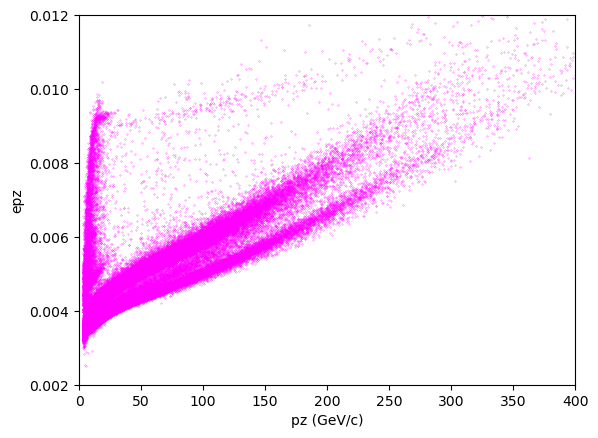

In [18]:
plt.plot(data_set2["pz"], data_set["epz"], "o", markersize = 0.2, color = "fuchsia")
plt.ylim([0.002,0.012])
plt.xlim([0, 400])
plt.xlabel("pz (GeV/c)")
plt.ylabel("epz")
plt.show();

This last plot looks like Fig1 as required.

### EXERCISE 3:

In [19]:
# first definning a new data set with only the variables of interest
variables = ["p", "tx", "ty", "eta", "phi"]
target = ["ep"]

target_df = data_set2[ target]
data_df = data_set2[variables ]

Define a simple single-layer Keras model in a function that uses the same number of nodes as the number of inputs.

In [20]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dropout

In [21]:
# num of inputs = 5 (p, tx, ty, eta, phi), num of outputs = 1 (ep)
num_inputs = 5; num_outputs = 1
# simple Keras model: use same # of nodes as # of inputs, single layer
num_nodes = num_inputs

In [22]:
def simple_model (): # create model
    model = Sequential ()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal",  activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs , kernel_initializer="normal")) # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam") 
    return model

Create a Keras Regressor using the simple model coded up above.
We are going to use a 10-fold cross validation, and take the average score of the ‘r2’ method [6] to evaluate the performance of the regression implemented with this initial simple model.
Hint #4: You can safely ignore warnings that package KerasRegressor is deprecated.

In [23]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
N_epochs = 50
# I tried a smaller batchSize but it was very expensive
batchSize = 500

with 100 epochs adn batch size of 1000 I was overtrainning at some points. I changed the combination a few times and found that the combination 50 epochs and 500 batch size works ok (except for the denser model, which needed a bit more trainning to give me a smaller deviation). Either way. In the last exercise when I try to find an optimize model I variate the umber of epochs in order to get a better R^2 mean value, but for the first tests 50 and 500 are the values I use.

In [25]:

# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
estimator = KerasRegressor(build_fn=simple_model , epochs=N_epochs , batch_size=batchSize) 
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values 
results = cross_val_score(estimator, data_df.values, target_df.values, cv=kfold, scoring="r2") 
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

2023-02-28 11:00:13.178725: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-28 11:00:13.281209: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/50
377/377 [==============================] - 1s 2ms/step - loss: 3.7208e-04
Epoch 2/50
377/377 [==============================] - 1s 2ms/step - loss: 4.7575e-07
Epoch 3/50
377/377 [==============================] - 1s 2ms/step - loss: 4.5671e-07
Epoch 4/50
377/377 [==============================] - 1s 2ms/step - loss: 4.5356e-07
Epoch 5/50
377/377 [==============================] - 1s 2ms/step - loss: 4.5675e-07
Epoch 6/50
377/377 [==============================] - 1s 3ms/step - loss: 4.3785e-07
Epoch 7/50
377/377 [==============================] - 1s 3ms/step - loss: 4.5019e-07
Epoch 8/50
377/377 [==============================] - 1s 3ms/step - loss: 4.4448e-07
Epoch 9/50
377/377 [==============================] - 1s 3ms/step - loss: 4.4802e-07
Epoch 10/50
377/377 [==============================] - 1s 2ms/step - loss: 4.4461e-07
Epoch 11/50
377/377 [==============================] - 1s 2ms/step - loss: 4.3710e-07
Epoch 12/50
377/377 [==============================] - 1s 2ms/s


Play with the number of epochs and the batch size. You can get a feel about how fast the estimator is converging if you switch to verbose=1 in the KerasRegressor call. Set the number of epochs to 100 as a starting point. Notice (by eye) how quickly the loss function converges as you change the batch size from (say) 5 to (say) 1,000. After you pick a pair of (epochs, batch-size) values you are comfortable with, you can keep them
fixed for the rest of this exercise.

Hint #5: The options in the code above are simply suggestions. You are very welcome (in fact, encouraged) to try out different options [7] and/or discuss your ideas with the TAs during the workshop hours.

### EXERCISE 4:

(a) (1 point) In the code of the previous example, we will be replacing the estimator created via the KerasRegressor call by a new “pipelined” estimator using the sklearn.pipeline.Pipeline method.

In [26]:
estimators = []
estimators.append(('standardize', StandardScaler())) 
estimators.append(('mlp', KerasRegressor(build_fn=simple_model , epochs=N_epochs , batch_size=batchSize)) )
pipeline = Pipeline(estimators)

The rest of the code remains the same. Evaluate the performance of the new estimator with standardised inputs. How does it perform compared to the previous example?

In [27]:
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values 
results = cross_val_score(pipeline, data_df.values, target_df.values, cv=kfold, scoring="r2") 
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Epoch 1/50
377/377 [==============================] - 1s 2ms/step - loss: 3.6018e-06
Epoch 2/50
377/377 [==============================] - 1s 2ms/step - loss: 4.9944e-07
Epoch 3/50
377/377 [==============================] - 1s 1ms/step - loss: 4.0580e-07
Epoch 4/50
377/377 [==============================] - 1s 2ms/step - loss: 3.9343e-07
Epoch 5/50
377/377 [==============================] - 1s 2ms/step - loss: 4.0744e-07
Epoch 6/50
377/377 [==============================] - 1s 1ms/step - loss: 3.8850e-07
Epoch 7/50
377/377 [==============================] - 1s 1ms/step - loss: 3.8820e-07
Epoch 8/50
377/377 [==============================] - 1s 1ms/step - loss: 3.8075e-07
Epoch 9/50
377/377 [==============================] - 1s 2ms/step - loss: 4.0069e-07
Epoch 10/50
377/377 [==============================] - 1s 1ms/step - loss: 3.8352e-07
Epoch 11/50
377/377 [==============================] - 1s 2ms/step - loss: 3.8989e-07
Epoch 12/50
377/377 [==============================] - 1s 1ms/s

In [28]:
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Standardised: 0.72 ± 0.01


With the pipeline estimator it performs better, with a higher R^2 mean value, so I'm going to keep using that for the following tests.

(b) (1 point) We will now up our game and attempt to build a denser model, i.e. a model with an additional NN layer.
Create a new denser model based on the simple model function, and by adding a new layer. For the first layer, use the same number of nodes as the number of inputs. For the second layer, choose a number of nodes anywhere between 2 and the number of inputs.
Run the new regressor and evaluate again its performance. Should you use standardised inputs again? Only if the previous exercise has shown that this improves the performance!


In [29]:
def denser_model (): # create model
    model = Sequential ()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal",  activation="relu"))
    model.add(Dense(2 , input_dim=num_inputs , kernel_initializer="normal",  activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs , kernel_initializer="normal")) # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam") 
    return model

In [30]:
estimators = []
estimators.append(('standardize', StandardScaler())) 
estimators.append(('mlp', KerasRegressor(build_fn=denser_model , epochs=N_epochs , batch_size=batchSize)) )
pipeline = Pipeline(estimators)

In [31]:
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values 
results = cross_val_score(pipeline, data_df.values, target_df.values, cv=kfold, scoring="r2") 
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Epoch 1/50
377/377 [==============================] - 1s 1ms/step - loss: 1.6859e-06
Epoch 2/50
377/377 [==============================] - 0s 1ms/step - loss: 5.2573e-07
Epoch 3/50
377/377 [==============================] - 0s 1ms/step - loss: 5.6010e-07
Epoch 4/50
377/377 [==============================] - 1s 2ms/step - loss: 5.2592e-07
Epoch 5/50
377/377 [==============================] - 0s 1ms/step - loss: 5.2335e-07
Epoch 6/50
377/377 [==============================] - 0s 1ms/step - loss: 5.1151e-07
Epoch 7/50
377/377 [==============================] - 0s 1ms/step - loss: 5.3219e-07
Epoch 8/50
377/377 [==============================] - 0s 1ms/step - loss: 5.1441e-07
Epoch 9/50
377/377 [==============================] - 0s 1ms/step - loss: 5.1890e-07
Epoch 10/50
377/377 [==============================] - 1s 1ms/step - loss: 5.1589e-07
Epoch 11/50
377/377 [==============================] - 1s 2ms/step - loss: 5.1797e-07
Epoch 12/50
377/377 [==============================] - 0s 1ms/s


(c) (1 point) We are now switching back to a single-layer NN, but with a greater number of nodes. We are going to call this the wider model. Use a number of nodes that is twice as large as the number of inputs.
Evaluate the performance of the new estimator. Which of the three architectures gives you the best performance?

In [32]:
def wider_model (): # create model
    num_nodes = 2*num_inputs
    model = Sequential ()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal",  activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs , kernel_initializer="normal")) # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam") 
    return model

In [33]:
estimators = []
estimators.append(('standardize', StandardScaler())) 
estimators.append(('mlp', KerasRegressor(build_fn=wider_model , epochs=N_epochs , batch_size=batchSize)) )
pipeline = Pipeline(estimators)

In [34]:
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values 
results = cross_val_score(pipeline, data_df.values, target_df.values, cv=kfold, scoring="r2") 
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Epoch 1/50
377/377 [==============================] - 1s 1ms/step - loss: 2.6504e-05
Epoch 2/50
377/377 [==============================] - 0s 1ms/step - loss: 4.7495e-07
Epoch 3/50
377/377 [==============================] - 0s 1ms/step - loss: 4.0702e-07
Epoch 4/50
377/377 [==============================] - 0s 1ms/step - loss: 3.9036e-07
Epoch 5/50
377/377 [==============================] - 0s 1ms/step - loss: 3.8137e-07
Epoch 6/50
377/377 [==============================] - 0s 1ms/step - loss: 3.7392e-07
Epoch 7/50
377/377 [==============================] - 1s 2ms/step - loss: 3.7391e-07
Epoch 8/50
377/377 [==============================] - 0s 1ms/step - loss: 3.7093e-07
Epoch 9/50
377/377 [==============================] - 0s 1ms/step - loss: 3.5705e-07
Epoch 10/50
377/377 [==============================] - 0s 1ms/step - loss: 3.5218e-07
Epoch 11/50
377/377 [==============================] - 0s 1ms/step - loss: 3.5883e-07
Epoch 12/50
377/377 [==============================] - 0s 1ms/s

From all the architectures used first thing was to note that the pipelined estimator performed better, so then the three differente models where compared using that type of estimator. And then, between the simple_model, denser_model, and wider_model the wider model was the one that performed the better, followed by the simple_modle and the worst was then denser model (by comparing the losses and the R^2 mean values printed).

### EXERCISE 5:


(a) (2 points) Use-your-creativity problem: Try to use a slightly different network to improve the average R2 score. For example, you could try changing the number of layers, and/or the number of nodes, and/or the number of input features if you are feeling brave. You get two full points if you beat my score (I got R2 = 0.81 ± 0.01).

In [57]:
def fun_model (): # create model
    num_nodes = 3*num_inputs
    model = Sequential ()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal",  activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs , kernel_initializer="normal")) # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam") 
    return model

In [58]:
estimators = []
estimators.append(('standardize', StandardScaler())) 
estimators.append(('mlp', KerasRegressor(build_fn=fun_model , epochs=N_epochs , batch_size=batchSize)) )
pipeline = Pipeline(estimators)

In [59]:
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values 
results = cross_val_score(pipeline, data_df.values, target_df.values, cv=kfold, scoring="r2") 
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Epoch 1/50
377/377 [==============================] - 2s 3ms/step - loss: 3.3548e-05
Epoch 2/50
377/377 [==============================] - 1s 2ms/step - loss: 5.7940e-07
Epoch 3/50
377/377 [==============================] - 1s 2ms/step - loss: 4.2850e-07
Epoch 4/50
377/377 [==============================] - 1s 2ms/step - loss: 4.0563e-07
Epoch 5/50
377/377 [==============================] - 1s 2ms/step - loss: 3.8322e-07
Epoch 6/50
377/377 [==============================] - 1s 2ms/step - loss: 3.5409e-07
Epoch 7/50
377/377 [==============================] - 1s 2ms/step - loss: 3.4835e-07
Epoch 8/50
377/377 [==============================] - 1s 2ms/step - loss: 3.4439e-07
Epoch 9/50
377/377 [==============================] - 0s 1ms/step - loss: 3.3672e-07
Epoch 10/50
377/377 [==============================] - 0s 1ms/step - loss: 3.3808e-07
Epoch 11/50
377/377 [==============================] - 1s 2ms/step - loss: 3.2722e-07
Epoch 12/50
377/377 [==============================] - 0s 1ms/s

(b) (1 point) Plot the actual-vs-predicted scatter plot for the best σp/p model. Obtain the predicted values with the following call:

In [60]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(pipeline, data_df.values, target_df.values, cv=kfold)

Epoch 1/50
377/377 [==============================] - 1s 1ms/step - loss: 1.6662e-05
Epoch 2/50
377/377 [==============================] - 1s 1ms/step - loss: 4.4683e-07
Epoch 3/50
377/377 [==============================] - 1s 1ms/step - loss: 3.7740e-07
Epoch 4/50
377/377 [==============================] - 1s 2ms/step - loss: 3.6168e-07
Epoch 5/50
377/377 [==============================] - 1s 1ms/step - loss: 3.5961e-07
Epoch 6/50
377/377 [==============================] - 1s 2ms/step - loss: 3.4024e-07
Epoch 7/50
377/377 [==============================] - 0s 1ms/step - loss: 3.4043e-07
Epoch 8/50
377/377 [==============================] - 0s 1ms/step - loss: 3.3537e-07
Epoch 9/50
377/377 [==============================] - 0s 1ms/step - loss: 3.3063e-07
Epoch 10/50
377/377 [==============================] - 0s 1ms/step - loss: 3.3360e-07
Epoch 11/50
377/377 [==============================] - 1s 3ms/step - loss: 3.2689e-07
Epoch 12/50
377/377 [==============================] - 1s 2ms/s

In [61]:
predicted.shape

(208984,)

In [62]:
target_df.values.shape

(208984, 1)

In [63]:
x = [0,2,5]
y = [0,2,5]

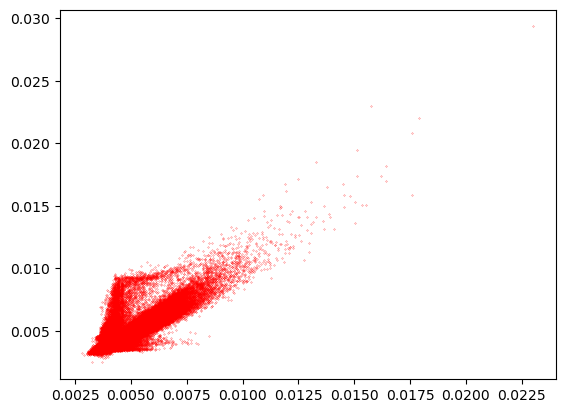

In [64]:
plt.plot(predicted,target_df.values , "o", markersize = 0.2, color = "red" )
plt.show();

Text(0, 0.5, 'true')

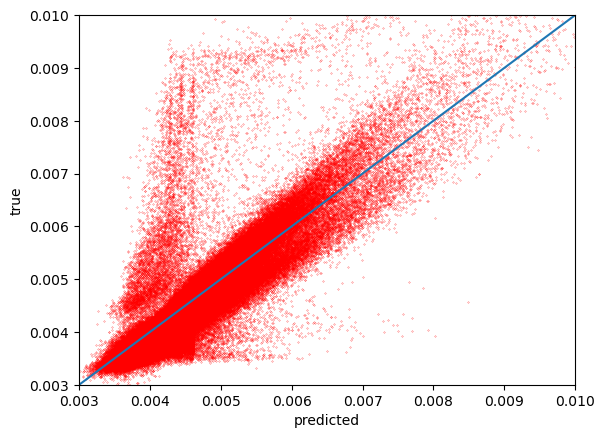

In [65]:
plt.plot(predicted,target_df.values , "o", markersize = 0.2, color = "red" )
plt.plot(x,y,  '-')
plt.xlim([0.003,0.01])
plt.ylim([0.003, 0.01])
plt.xlabel("predicted")
plt.ylabel("true")

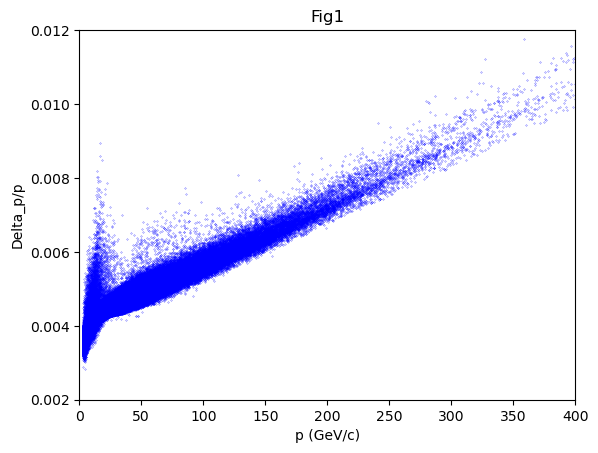

In [66]:
plt.plot(data_df["p"], predicted, "o", markersize = 0.2, color = "blue")
plt.ylim([0.002,0.012])
plt.xlim([0, 400])
plt.xlabel("p (GeV/c)")
plt.ylabel("Delta_p/p")
plt.title("Fig1")
plt.show();

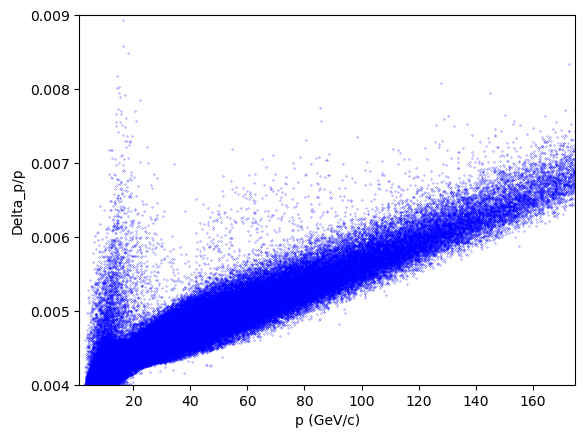

In [67]:
plt.plot(data_df["p"], predicted, "o", markersize = 0.2, color = "blue")
plt.ylim([0.004,0.009])
plt.xlim([1, 175])
plt.xlabel("p (GeV/c)")
plt.ylabel("Delta_p/p")
plt.show();

After seeing the performance with the different architectures for a denser model it went worse and for a wider model it gets better. I'm going to keep using an even wider model and feed it with more variables and see if that gives me an even better performance.

In [68]:
data_set2.head()

,Unnamed: 0,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,71.845851,0.005477
1,1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.627791,0.004052
2,2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.536851,0.003908
3,3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.617790,0.003866
4,4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.242050,0.004989


In [78]:
# first definning a new data set with only the variables of interest
variables2 = [ "p", "pol", "pt", "qp", "tx", "ty", "eta", "phi", "zV", "pz"]
target = ["ep"]

target_df = data_set2[ target]
data2_df = data_set2[variables2]

In [95]:
N_epochs = 80

In [96]:
# num of inputs = 5 (p, tx, ty, eta, phi), num of outputs = 1 (ep)
num_inputs = 10; num_outputs = 1
# simple Keras model: use same # of nodes as # of inputs, single layer
num_nodes = num_inputs

In [97]:
def fun2_model (): # create model
    num_nodes = 3*num_inputs
    model = Sequential ()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal",  activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs , kernel_initializer="normal")) # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam") 
    return model

In [98]:
estimators = []
estimators.append(('standardize', StandardScaler())) 
estimators.append(('mlp', KerasRegressor(build_fn=fun2_model , epochs=N_epochs , batch_size=batchSize)) )
pipeline = Pipeline(estimators)

In [99]:
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values 
results = cross_val_score(pipeline, data2_df.values, target_df.values, cv=kfold, scoring="r2") 
#print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Epoch 1/80
377/377 [==============================] - 3s 4ms/step - loss: 6.1731e-04
Epoch 2/80
377/377 [==============================] - 2s 5ms/step - loss: 6.3518e-06
Epoch 3/80
377/377 [==============================] - 2s 4ms/step - loss: 1.3595e-06
Epoch 4/80
377/377 [==============================] - 2s 4ms/step - loss: 6.2127e-07
Epoch 5/80
377/377 [==============================] - 1s 4ms/step - loss: 4.7845e-07
Epoch 6/80
377/377 [==============================] - 1s 4ms/step - loss: 3.9297e-07
Epoch 7/80
377/377 [==============================] - 1s 4ms/step - loss: 3.6781e-07
Epoch 8/80
377/377 [==============================] - 1s 3ms/step - loss: 3.4779e-07
Epoch 9/80
377/377 [==============================] - 1s 2ms/step - loss: 3.3402e-07
Epoch 10/80
377/377 [==============================] - 1s 2ms/step - loss: 3.2564e-07
Epoch 11/80
377/377 [==============================] - 1s 2ms/step - loss: 3.1981e-07
Epoch 12/80
377/377 [==============================] - 1s 3ms/s

In [100]:
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Standardised: 0.78 ± 0.01


This last model worked pretty well, but still not 0.81 so I might train it again for more epochs and making it a bit wider and see if it changes a bit.

In [101]:
N_epochs = 100

In [102]:
def fun3_model (): # create model
    num_nodes = 4*num_inputs
    model = Sequential ()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input
    model.add(Dense(num_nodes , input_dim=num_inputs , kernel_initializer="normal",  activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(num_outputs , kernel_initializer="normal")) # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam") 
    return model

In [104]:
estimators = []
estimators.append(('standardize', StandardScaler())) 
estimators.append(('mlp', KerasRegressor(build_fn=fun3_model , epochs=N_epochs , batch_size=batchSize)) )
pipeline = Pipeline(estimators)

In [105]:
# must always set the random seed for reproducibility
Answer_to_all_questions = 42
np.random.seed(Answer_to_all_questions)
kfold = KFold(n_splits=10, random_state=Answer_to_all_questions , shuffle=True)
# data and target are 5-column and 1-column arrays produced with pandas.DataFrame.values 
results = cross_val_score(pipeline, data2_df.values, target_df.values, cv=kfold, scoring="r2") 

Epoch 1/100
377/377 [==============================] - 3s 4ms/step - loss: 1.7804e-04
Epoch 2/100
377/377 [==============================] - 1s 3ms/step - loss: 1.1561e-06
Epoch 3/100
377/377 [==============================] - 1s 2ms/step - loss: 4.9272e-07
Epoch 4/100
377/377 [==============================] - 1s 2ms/step - loss: 3.8357e-07
Epoch 5/100
377/377 [==============================] - 1s 2ms/step - loss: 3.5988e-07
Epoch 6/100
377/377 [==============================] - 1s 2ms/step - loss: 3.4737e-07
Epoch 7/100
377/377 [==============================] - 1s 2ms/step - loss: 3.4194e-07
Epoch 8/100
377/377 [==============================] - 1s 3ms/step - loss: 3.4262e-07
Epoch 9/100
377/377 [==============================] - 2s 4ms/step - loss: 3.2886e-07
Epoch 10/100
377/377 [==============================] - 1s 3ms/step - loss: 3.2489e-07
Epoch 11/100
377/377 [==============================] - 1s 3ms/step - loss: 3.2457e-07
Epoch 12/100
377/377 [==============================

In [106]:
print("Standardised: %.2f %s %.2f" % (results.mean(), u"\u00B1", results.std()))

Standardised: 0.84 ± 0.02


Better than 0.81 :)

In [108]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(pipeline, data2_df.values, target_df.values, cv=kfold)

Epoch 1/100
377/377 [==============================] - 2s 3ms/step - loss: 1.3823e-04
Epoch 2/100
377/377 [==============================] - 1s 3ms/step - loss: 7.6181e-07
Epoch 3/100
377/377 [==============================] - 1s 3ms/step - loss: 4.1100e-07
Epoch 4/100
377/377 [==============================] - 1s 3ms/step - loss: 3.6985e-07
Epoch 5/100
377/377 [==============================] - 1s 3ms/step - loss: 3.5523e-07
Epoch 6/100
377/377 [==============================] - 1s 3ms/step - loss: 3.4737e-07
Epoch 7/100
377/377 [==============================] - 1s 3ms/step - loss: 3.4901e-07
Epoch 8/100
377/377 [==============================] - 1s 3ms/step - loss: 3.3280e-07
Epoch 9/100
377/377 [==============================] - 1s 3ms/step - loss: 3.4034e-07
Epoch 10/100
377/377 [==============================] - 1s 4ms/step - loss: 3.3351e-07
Epoch 11/100
377/377 [==============================] - 1s 3ms/step - loss: 3.1927e-07
Epoch 12/100
377/377 [==============================

Text(0, 0.5, 'true')

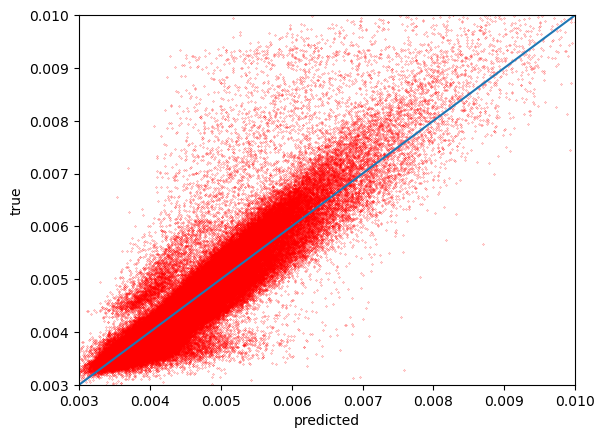

In [109]:
plt.plot(predicted,target_df.values , "o", markersize = 0.2, color = "red" )
plt.plot(x,y,  '-')
plt.xlim([0.003,0.01])
plt.ylim([0.003, 0.01])
plt.xlabel("predicted")
plt.ylabel("true")

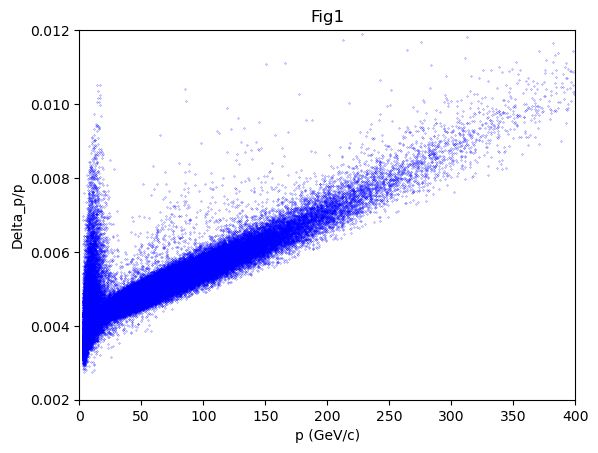

In [110]:
plt.plot(data2_df["p"], predicted, "o", markersize = 0.2, color = "blue")
plt.ylim([0.002,0.012])
plt.xlim([0, 400])
plt.xlabel("p (GeV/c)")
plt.ylabel("Delta_p/p")
plt.title("Fig1")
plt.show();